<a href="https://colab.research.google.com/github/snanditachn/Nandita.S_cts/blob/main/Nandita_S_2211551_Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The Basics: Training my first neural network

1. We will use Tensorflow
2. Keras is intergrated into tf
3. Train with the given data
4. Improve the model with added data

We have to convert from clesius to farenheit, with appropriate formula.

Of course, it would be simple enouh to create a conventional Python function that directly performs this calculation, but that is not machine learning.

Instead, we will give Tensorflow some celsius values, and their corresponding fahrenheit values. Then we will train a model that figures out the formula through the training process.

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.9.2'

In [ ]:
import numpy as np
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

## Setting up Training data

As we saw before, supervised Machine Learning is all about figuring out an algorithm given a set of inputs and outputs. 

Since the task in this codelab is to create a model that can give the temperature in fahrenheit when given the degrees in celcius, we create 2 lists, celsius_q and fahrenheit_a that we can use to train our model.

In [ ]:
celsius_q = np.array([-40, -10, 0, 8, 15, 22, 38])
fahrenheit_a = np.array([-40,  14, 32, 46, 59, 72, 100],  dtype=float)
for i,c in enumerate(celsius_q):
  print("{} degrees Celsius = {} degrees Fahrenheit".format(c, fahrenheit_a[i]))

-40 degrees Celsius = -40.0 degrees Fahrenheit
-10 degrees Celsius = 14.0 degrees Fahrenheit
0 degrees Celsius = 32.0 degrees Fahrenheit
8 degrees Celsius = 46.0 degrees Fahrenheit
15 degrees Celsius = 59.0 degrees Fahrenheit
22 degrees Celsius = 72.0 degrees Fahrenheit
38 degrees Celsius = 100.0 degrees Fahrenheit


Feature — The input(s) to our model. 
          In this case, a single value — the degrees is Celsius.

Labels —  The output our model predicts. 
          In this case, a single value — the degrees in Fahrenheit.
 
 Example — A pair of inputs/outputs used during training. 
         In our case a pair of values from celsius_q and fahrenheit_a at a specific index, such as (22,72).

## Create the Model


Next, create the model. We will use the simplest possible model we can, a dense network. Since the problem is straightforward, this network will require only a single layer, with a single neuron.



## Build a layer

We will call that layer l0 and create it by installing 

tf.keras.layers.Dense

with the following configurations,



1.   input_shape=[1] -- This tells that the input to this layer is a single value. That is, the shape is a one-dimensional array with one member. Since this is the first and only layer, that input shape is the input shape of the entire model.
The single value is a floating point number, representing degrees Celsius.
2.   units=1 -- This is the number of neurons in the layer. the number of neurons defines how many internal variables the layer h to try to learn how to solve the problem. Since this is the final layer, it is also the size of the model's output - a single float value representing degrees fahrenheit.

In a multi-layered network, the size and shape of the layer would need to match the input_shape of the next layer.



In [ ]:
l0 = tf.keras.layers.Dense(units=1, input_shape = [1])

## Assemble layers into model

Once layers are defined, they should be asembled into a model. 

The sequential model definition takes a list of layers as an argument and specifies the calculation order from the input to the output.

We have used only 1 layer l0 in this example.

In [ ]:
model = tf.keras.Sequential([l0])

(model is created so easily, with tensorflow)

In [ ]:
# model can be created by running this code instead of the above 2 codes
"""model = tf.kers.Sequential([
  tf.keras.layers.Dense(units=1, input_shape=[1])
])"""

## Compile the Model

Before training , the model should be compiled. 
The model is given the following functions when compiled for training,



*   Loss function -- A way of measuring how far off predictions are from the desired outcome. Loss is the measured difference.
*   Optimizer function -- a way of adjusting internal values in order to reduce the loss



In [ ]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

These are used during training to first calculate the loss at each point, and then improve it. In fact, the act of calculating the current loss of a model and then improving it is precisely what training is.

During training, the optimizer function is used to calculate adjustments to the model's interval variables. The goal is to adjust the internal variables until the model mirrors the actual equation for converting celcius to fahrenheit.

Tensorflow uses numerical analysis to perform this tuning, and all this complexity is hidden fro you so we will not goo into the details here. What is useful to know about these parameters are:

The loss function, meansquared mean and the optimizer, Adam used here are standard for a simple models like this one, but many others are available. It is not important to know how these specific functions work at this point.

One part of the optimizer you may need to think about when building yourown models is the learning rate. This is the step size taken when adjusting values in the model. If the value is too small, it will take too many iterations to train the model. Too large learning rate will reduce the accuracy. Finding a good value often involves some trial and error, but the range is usually within 0.001(default) and 0.1


## Train the model

Training is done by 'fit' method.

During training, the model takes in celsius values, performs a calculation using the current interval variables( called weights) and outputs values which are meant to be the fahrenheit equivalent. Since the weights are initially set randomly, the output will not be close to the correct value. The difference between the actual output and the desired output is calculated using the loss function, and the optimizer function directs how the weights should be adjusted.

This cycle of calculate, compare, adjust is controlled by the 'fit' method. The first argument is the input, the second argument is the desired outputs. The Epochs Argument specifies how many times this cycle should be run, and the Verbose argument controls how much output the method produces.

In [ ]:
history = model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")

Finished training the model


## Display training stats

The fit method returns a history object. We use it to plot how the loss of the model goesdown after each training epoch. Ahigh loss means that the fahrenheit degrees the model predicts is far from the corresponding value in fahrenheit_a

Using matplotlib, we can visualise this. As you see,our model improves very quicly at first, and then has a steady, slow improvement untill its very near 'perfect' towards the end.

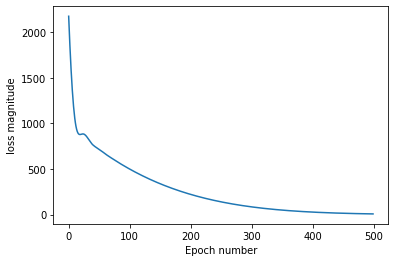

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch number')
plt.ylabel('loss magnitude')
plt.plot(history.history['loss'])

## Use the model to predict values

Now we have a model that has been trained to learn the relationship beteen celsius_q and fahrenheit_a. You can use the pedict method to have it calculate the fahrenheit degrees for a precisely unknown Celcius degrees.

So, If celsius is 100, we ll try to predict the fahrenheit value, using our model.

In [ ]:
print(model.predict([100.0]))

1/1 [==============================] - 0s 77ms/step
[[211.33078]]


We predict for 100 celsius as its not a part of our data.

The boiling point in farenheit is 212.

As we trained using a small data, the prediction is not accurate.
 
To improve this we have to give more data or the machine to learn.

If we give more data, the model can overpredict the value, and show 213. or underpredict and show, 173.

For this we need to do many experiments and using trial and error we can find a data and model wich predicts accurately.

In [ ]:
print("layer variables:{}".format(l0.get_weights()))

layer variables:[array([[1.8216144]], dtype=float32), array([29.169334], dtype=float32)]


In [ ]:
l0 = tf.keras.layers.Dense(units=4, input_shape=[1])
l1 = tf.keras.layers.Dense(units=4)
l2 = tf.keras.layers.Dense(units=1)
model = tf.keras.Sequential([l0, l1, l2])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")
print(model.predict([100.0]))
print("Model predicts that 100 degrees Celsius is: {} degrees Fahrenheit".format(model.predict([100.0])))
print("These are the l0 variables: {}".format(l0.get_weights()))
print("These are the l1 variables: {}".format(l1.get_weights()))
print("These are the l2 variables: {}".format(l2.get_weights()))

Finished training the model
1/1 [==============================] - 0s 57ms/step
[[211.74744]]
1/1 [==============================] - 0s 29ms/step
Model predicts that 100 degrees Celsius is: [[211.74744]] degrees Fahrenheit
These are the l0 variables: [array([[ 0.70396763, -0.35244745, -0.30848685,  0.43946347]],
      dtype=float32), array([3.3825917, 1.6974581, 1.8917744, 3.4170501], dtype=float32)]
These are the l1 variables: [array([[ 0.08446286, -1.3092208 , -1.4259516 ,  0.7403801 ],
       [ 0.43533754, -0.2118044 , -0.24466069,  1.1869311 ],
       [ 0.1582033 , -0.76564145, -0.15756066,  0.74000484],
       [ 0.4034703 , -0.37028918, -1.330203  ,  1.3141707 ]],
      dtype=float32), array([-0.2847425, -2.8154511, -2.680517 ,  3.516403 ], dtype=float32)]
These are the l2 variables: [array([[-0.21332772],
       [-0.7489516 ],
       [-0.5055878 ],
       [ 1.0861462 ]], dtype=float32), array([3.1627915], dtype=float32)]


Change the epoch values and experiment, 

1 epoch is after, all the 9 eg data, it gives the cummulative loss.

More epoch, it goes through the data more times, 

Whereas learning rate is the step size.in this example as the data is small, learning rate is not of much importance, but with real data it is very important.

Early stopping - like breaking the speed of the learning, it will stop the learning in the beggining and the epoch values will have no impact in the accuracy.(will see in next assignment)



### In this assignment, get experiment with data, by adding more egs and adjustig epoch, learning rate, etc., to get the most accurate prediction possible.

## Trail and error to get higher accuracy in prediction.

In [ ]:
celsius_q = np.array([-40, -10, 0, 8, 15, 22, 38, 45, 10, 65, 55])
fahrenheit_a = np.array([-40,  14, 32, 46.4, 59, 71.6, 100.4, 113, 50, 149, 131],  dtype=float)
for i,c in enumerate(celsius_q):
  print("{} degrees Celsius = {} degrees Fahrenheit".format(c, fahrenheit_a[i]))

-40 degrees Celsius = -40.0 degrees Fahrenheit
-10 degrees Celsius = 14.0 degrees Fahrenheit
0 degrees Celsius = 32.0 degrees Fahrenheit
8 degrees Celsius = 46.4 degrees Fahrenheit
15 degrees Celsius = 59.0 degrees Fahrenheit
22 degrees Celsius = 71.6 degrees Fahrenheit
38 degrees Celsius = 100.4 degrees Fahrenheit
45 degrees Celsius = 113.0 degrees Fahrenheit
10 degrees Celsius = 50.0 degrees Fahrenheit
65 degrees Celsius = 149.0 degrees Fahrenheit
55 degrees Celsius = 131.0 degrees Fahrenheit


In [ ]:
l0 = tf.keras.layers.Dense(units=1, input_shape = [1])

In [ ]:
model = tf.keras.Sequential([l0])

In [ ]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

In [ ]:
history = model.fit(celsius_q, fahrenheit_a, epochs=1000, verbose=False)
print("Finished training the model")

Finished training the model


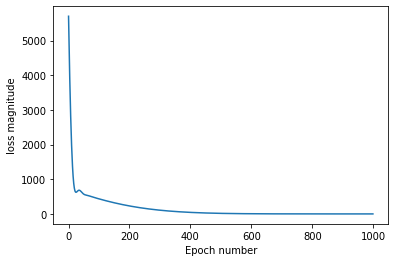

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch number')
plt.ylabel('loss magnitude')
plt.plot(history.history['loss'])

In [ ]:
print(model.predict([100.0]))

1/1 [==============================] - 0s 49ms/step
[[212.07349]]
